<a href="https://colab.research.google.com/github/Nitheesh-Nitheesh-Notheesh/Breast-Cancer-Wisconsin-Diagnostic-/blob/main/Breast_Cancer_Wisconsin_(Diagnostic)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [125]:
import pandas as pd
import numpy as np
from sklearn . svm import SVC
from sklearn . model_selection import train_test_split
from sklearn . metrics import accuracy_score
from sklearn . metrics import confusion_matrix
from sklearn . metrics import ConfusionMatrixDisplay
from sklearn . preprocessing import StandardScaler
from sklearn . metrics import classification_report

In [99]:
df = pd . read_csv( "/content/KNNAlgorithmDataset.csv" )
df .head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [104]:
df ['diagnosis']. value_counts ()

,count
diagnosis,
B,357
M,212


In [129]:
df . info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [101]:
df . drop ( ['id'] , axis = 1  , inplace = True )

In [102]:
df . duplicated () .sum()

np.int64(0)

In [105]:
df . isna( ) . sum()

,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0
symmetry_mean,0


In [106]:
X = df . iloc [ :, 1 : 31]
X . info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              569 non-null    float64
 1   texture_mean             569 non-null    float64
 2   perimeter_mean           569 non-null    float64
 3   area_mean                569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   concavity_mean           569 non-null    float64
 7   concave points_mean      569 non-null    float64
 8   symmetry_mean            569 non-null    float64
 9   fractal_dimension_mean   569 non-null    float64
 10  radius_se                569 non-null    float64
 11  texture_se               569 non-null    float64
 12  perimeter_se             569 non-null    float64
 13  area_se                  569 non-null    float64
 14  smoothness_se            5

In [107]:
df['diagnosis']. replace ('M' , 1 , inplace= True)
df['diagnosis'] . replace('B' , 0 , inplace=True)

/tmp/ipython-input-4222042717.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['diagnosis']. replace ('M' , 1 , inplace= True)
/tmp/ipython-input-4222042717.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [108]:
Y = df . iloc[ : , 0 ]
Y . info()

<class 'pandas.core.series.Series'>
RangeIndex: 569 entries, 0 to 568
Series name: diagnosis
Non-Null Count  Dtype
--------------  -----
569 non-null    int64
dtypes: int64(1)
memory usage: 4.6 KB


In [109]:
x_train , x_test , y_train , y_test = train_test_split(X , Y , test_size=0.2 , random_state= 0)

In [110]:
x_test .shape

(114, 30)

In [111]:
y_test . shape

(114,)

In [112]:
x_train . shape

(455, 30)

In [113]:
y_train . shape

(455,)

In [92]:
ss = StandardScaler ()
x_train = ss . fit_transform(x_train)
x_test = ss . transform(x_test)



/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [116]:

for i in range(1, 200):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn . fit ( x_train , y_train)
    y_predict = knn . predict( x_test )
    ac = (accuracy_score(y_predict , y_test))*100
    if ac > 90 :
        print(ac,'i',i)

91.22807017543859 i 1
92.98245614035088 i 2
91.22807017543859 i 3
92.98245614035088 i 4
93.85964912280701 i 5
95.6140350877193 i 6
94.73684210526315 i 7
96.49122807017544 i 8
96.49122807017544 i 9
96.49122807017544 i 10
96.49122807017544 i 11
96.49122807017544 i 12
96.49122807017544 i 13
96.49122807017544 i 14
96.49122807017544 i 15
96.49122807017544 i 16
96.49122807017544 i 17
96.49122807017544 i 18
96.49122807017544 i 19
96.49122807017544 i 20
96.49122807017544 i 21
96.49122807017544 i 22
96.49122807017544 i 23
96.49122807017544 i 24
96.49122807017544 i 25
95.6140350877193 i 26
95.6140350877193 i 27
95.6140350877193 i 28
95.6140350877193 i 29
94.73684210526315 i 30
94.73684210526315 i 31
94.73684210526315 i 32
94.73684210526315 i 33
94.73684210526315 i 34
94.73684210526315 i 35
94.73684210526315 i 36
94.73684210526315 i 37
94.73684210526315 i 38
94.73684210526315 i 39
94.73684210526315 i 40
94.73684210526315 i 41
94.73684210526315 i 42
95.6140350877193 i 43
93.85964912280701 i 44
94.

In [118]:
knn = KNeighborsClassifier(n_neighbors=11)
knn . fit ( x_train , y_train)
y_predict = knn . predict( x_test )
ac = (accuracy_score(y_predict , y_test))*100
y_predict

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0])

In [80]:
y_test.values

array([1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1])

In [119]:
cm = confusion_matrix(y_predict , y_test)
print(cm)

[[66  3]
 [ 1 44]]


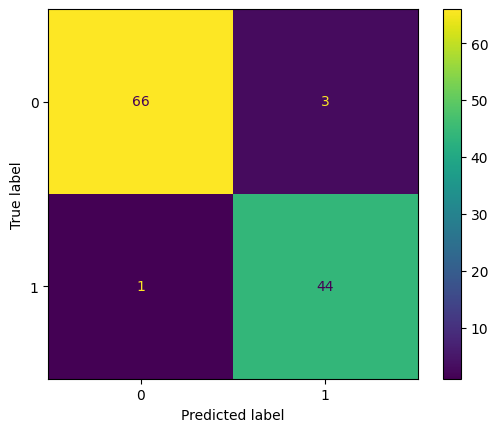

In [124]:
# cmd = ConfusionMatrixDisplay()
cmd = ConfusionMatrixDisplay. from_predictions(y_predict,y_test)
print(cmd)

In [126]:
cr = classification_report(y_predict,y_test)
print(cr)


              precision    recall  f1-score   support

           0       0.99      0.96      0.97        69
           1       0.94      0.98      0.96        45

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114



In [128]:
print('Using knn accuracy_score is ->>---------->' ,ac)

Using knn accuracy_score is ->>----------> 96.49122807017544
